<a href="https://colab.research.google.com/github/ShoSato-047/R_review/blob/main/STAT380_1_1_(2025)_Review_of_ordinary_linear_regression_the_MLR_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The multiple linear regression model

As you learned in STAT 360, the MLR model attempts to explain a quantitative response $Y_i$ using more than one $X$ term.  This becomes *multiple linear regression* (MLR) and takes on the form:

$$Y_i = \beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i} + ... + \beta_p X_{pi} + \epsilon_i$$


* $i=1,...,n$ for $n$ observational units
* $Y_i$ is the observed response
* $X_{ji}$ is the observed value of the $j^{th}$ term for the $i^{th}$ data point
* $\epsilon_i$ is the residual: not observed, but can be estimated

In STAT 360, when the MLR model "works" well to describe $Y_i$, the residuals have mean of 0, that is:

$$E(\epsilon_i) =0$$

Here, $E()$ stands for *expected value.*  It follows then that another way to express the MLR model is:

$$E(Y_i|\vec X_i) = \beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i} + ... + \beta_p X_{pi}$$

where $\vec X_i$ is the *vector* of $X$'s we are using to model $Y_i$.

# Case study: Kentucky Derby

<center>
<figure> <img src="https://www.kentuckyderby.com/wp-content/uploads/sites/2/2024/02/MystikDan-2024Southwest-coady1280.jpg" width="30%">
<figcaption> <i>2024 Kentucky Derby winner Mystik Dan; image from <a href='https://www.kentuckyderby.com/horses/news/kentucky-derby-horse-profile-mystik-dan/'> KentuckyDerby.com </a> </i> </figcaption>
</figure>
</center>

For our case study we will look at data from Kentucky Derby winners:


In [ ]:
library(tidyverse)

In [ ]:
derby_data <- read.csv('https://www.dropbox.com/s/t1hsmyan1mpp77y/KentuckyDerbyClean.csv?dl=1') %>% mutate(Fast=ifelse(Fast=='Fast', 'Yes','No'))
head(derby_data)

,Year,Winner,Jockey,Track,Speed,Fast
,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,2024,Mystik Dan,Brian Hernandez Jr.,Fast,53.51062,Yes
2,2023,Mage,Javier Castellano,Fast,54.28971,Yes
3,2022,Rich Strike,Sonny Leon,Fast,53.82921,Yes
4,2021,Mandaloun,Florent Geroux,Fast,54.53644,Yes
5,2020,Authentic,John Velazquez,Fast,54.72183,Yes
6,2019,Country House,Flavien Prat,Sloppy,53.25587,No


These data are sourced from [Wikipedia](https://en.wikipedia.org/wiki/Kentucky_Derby).  The conditions of the course are represented in `Track`.  `Speed` represents the average speed of each winner, in feet/second.  `Fast` is an binary variable representing whether the track was in "fast" condition.

The response variable $Y_i$ to be modeled is `Speed` (the average speed of the winning horse, in feet/second).  We will use two columns to model this response:

* `Year`
* `Fast` (a binary indicator of whether or not the track was in "fast" condition that year)

## Exploratory analysis

A good first step in any data analysis is to explore the relationship between the response and predictor(s).  With a quantitative response, we can do this with a scatterplot:

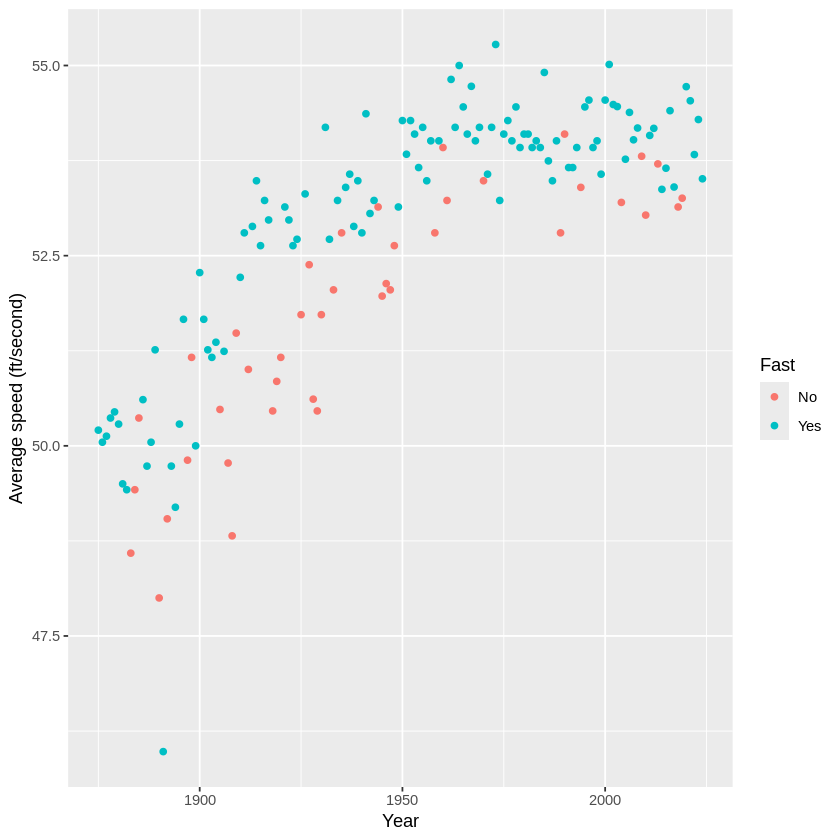

In [ ]:
ggplot(data = derby_data) +
  geom_point(aes(x = Year, y = Speed, col = Fast)) +
  ylab('Average speed (ft/second)')

Of note:

* The winning speed on fast tracks on average is higher than the winning speed on not fast tracks, throughout time
* For both fast and not fast tracks, the winning speeds have been increasing at approximately the same rate
* The relationship of speed with year appears to be nonlinear, having plateaued somewhat in recent years.

# From variables to terms

In STAT 360, you learned how to model very flexible relationships by converting variables to terms.  Terms are needed to:

* Model categorical variables;
* Model nonlinearity;
* Model interactions.


In the plot above, we noted a nonlinear relationship of `Speed` with `Year`, as well as a consistently higher `Speed` when the track was `Fast=Yes`.  We can model this relationship in a multiple linear regression model with the following terms:


$$Speed_i = \beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i} + \beta_3 U_i+\epsilon_i$$

where:
$$X_{1i}=Year_i,$$

$$X_{2i}=Year_i^2,$$

$$U_i = \begin{cases} 0 & Fast_i = No \\
1 & Fast_i = Yes \end{cases}
$$


Fitting the model:

In [ ]:
# lm = linear model

In [ ]:
quadratic_additive_model <- lm(Speed~Year + I(Year^2) + Fast, data = derby_data)
summary(quadratic_additive_model)


Call:
lm(formula = Speed ~ Year + I(Year^2) + Fast, data = derby_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6267 -0.4014  0.0242  0.4806  1.3420 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.460e+03  1.337e+02 -10.924  < 2e-16 ***
Year         1.521e+00  1.372e-01  11.088  < 2e-16 ***
I(Year^2)   -3.822e-04  3.518e-05 -10.863  < 2e-16 ***
FastYes      1.114e+00  1.343e-01   8.295 6.57e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7215 on 146 degrees of freedom
Multiple R-squared:  0.8344,	Adjusted R-squared:  0.831 
F-statistic: 245.2 on 3 and 146 DF,  p-value: < 2.2e-16


The ***model matrix*** is a clear representation of how the variables in the data frame have been converted to regression terms:

In [ ]:
additive_model_matrix <- model.matrix(quadratic_additive_model)
head(additive_model_matrix)

,(Intercept),Year,I(Year^2),FastYes
1,1,2024,4096576,1
2,1,2023,4092529,1
3,1,2022,4088484,1
4,1,2021,4084441,1
5,1,2020,4080400,1
6,1,2019,4076361,0


The `lm` object also contains residuals and fitted values, which we can add to the data frame:

In [ ]:
yhat <- fitted(quadratic_additive_model)
ehat <- residuals(quadratic_additive_model)

In [ ]:
derby_data$yhat <- yhat
derby_data$ehat <- ehat
head(derby_data)

,Year,Winner,Jockey,Track,Speed,Fast,yhat,ehat
,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,2024,Mystik Dan,Brian Hernandez Jr.,Fast,53.51062,Yes,53.89860,-0.3879834
2,2023,Mage,Javier Castellano,Fast,54.28971,Yes,53.92430,0.3654131
3,2022,Rich Strike,Sonny Leon,Fast,53.82921,Yes,53.94923,-0.1200115
4,2021,Mandaloun,Florent Geroux,Fast,54.53644,Yes,53.97339,0.5630494
5,2020,Authentic,John Velazquez,Fast,54.72183,Yes,53.99679,0.7250395
6,2019,Country House,Flavien Prat,Sloppy,53.25587,No,52.90579,0.3500777


* Verify $\hat Y_1$ and $\hat \epsilon_1$.

In [ ]:
 coefficients(quadratic_additive_model)

(Intercept)          Year     I(Year^2)       FastYes 
-1.460056e+03  1.520978e+00 -3.821773e-04  1.113635e+00

In [ ]:
# Plug and chug:

y_hat = -1460.05619251589 + 1.52097798804493*2024 + -0.000382177283310913*2024^2 + 1.11363471366445*1
y_hat

[1] 53.8986

In [ ]:
# Residual = Y -Yhat
53.51062 - 53.8986034440257

[1] -0.3879834

We can plot the fitted values from the model on our scatterplot:

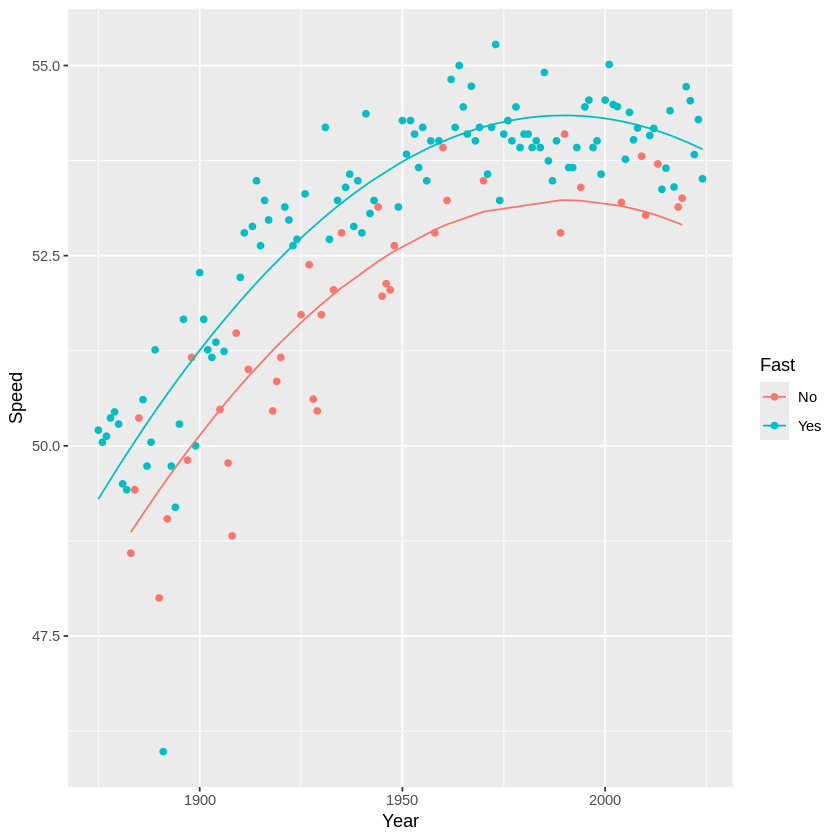

In [ ]:
ggplot(data = derby_data) +
  geom_point(aes(x = Year, y = Speed, col = Fast)) +
    geom_line(aes(x = Year, y = yhat, col = Fast))

The vertical distance between these lines is *identical* for all `Year` values.

## Note on polynomial syntax in `R`

In the previous model, we specified a quadratic model for `Year` by manually specifying `Year + I(Year^2)`.  For higher-order polynomials, this quickly becomes cumbersome.  The `poly()` function allows us to specify `p-`degree polynomials efficiently, but note that the created polynomials are orthoganalized for numerical reasons: i.e. the terms created are not just `Year+Year^2`.  However, the fitted values will be the same:

In [ ]:
# poly(#) = add more orders # in polynomial quickly

In [ ]:
quadratic_additive_model_shortcut <- lm(Speed~poly(Year,2) + Fast, data = derby_data)
head(model.matrix(quadratic_additive_model_shortcut))

,(Intercept),"poly(Year, 2)1","poly(Year, 2)2",FastYes
1,1,0.1404817,0.1789588,1
2,1,0.1385960,0.1717524,1
3,1,0.1367103,0.1646434,1
4,1,0.1348247,0.1576318,1
5,1,0.1329390,0.1507175,1
6,1,0.1310534,0.1439007,0


In [ ]:
head(fitted(quadratic_additive_model))

1        2        3        4        5        6 
53.89860 53.92430 53.94923 53.97339 53.99679 52.90579

In [ ]:
head(fitted(quadratic_additive_model_shortcut))

1        2        3        4        5        6 
53.89860 53.92430 53.94923 53.97339 53.99679 52.90579

# Considering an interaction

Whereas the previous model forced a constant vertical gap between `Fast = Yes` and `Fast = No`, a more flexible fit allows for completely separate polynomials for fast and not-fast years.  Let's first explore what this looks like visually; note the use of `geom_smooth()`, with a `formula = ` specification, to allow for entirely different polynomials for the two track conditions:

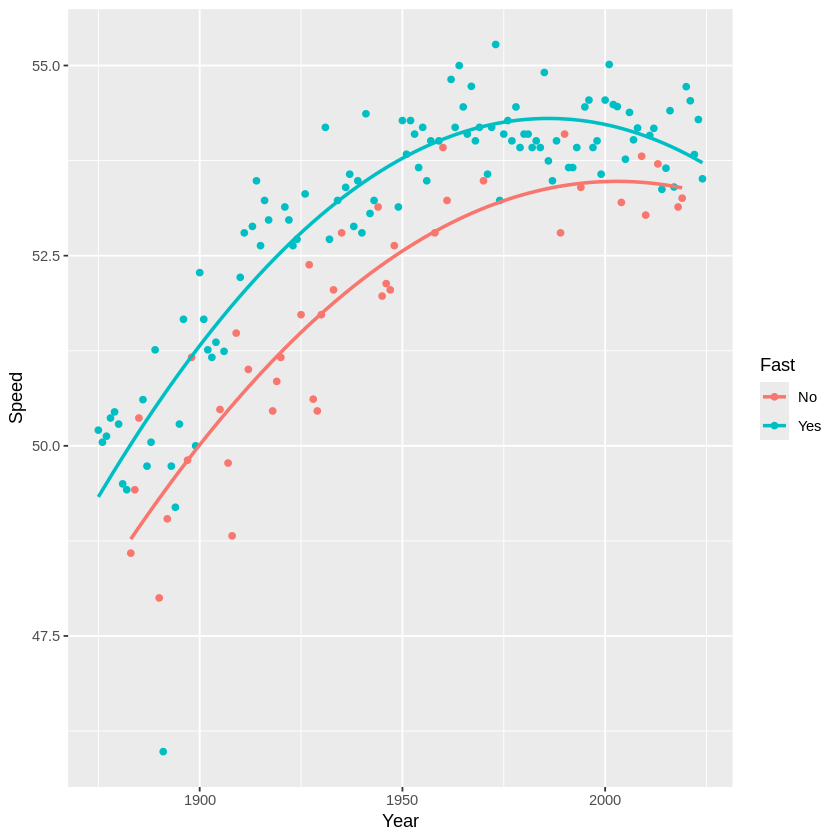

In [ ]:
ggplot(data = derby_data) +
  geom_point(aes(x = Year, y = Speed, col = Fast)) +
    geom_smooth(aes(x = Year, y = Speed, col = Fast), method = 'lm', formula = y~poly(x,2), se = FALSE)

The smooths above are from this model:


$$Speed_i = \beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i} + \beta_3 U_i + \beta_4 X_{1i}\cdot U_i + \beta_5 X_{2i}\cdot U_i+\epsilon_i$$

The terms $X_{1i}$, $X_{2i}$, and $U_i$ are all defined as above.  The inclusion of the *interaction terms* $X_{1i}\cdot U_i$ and $X_{2i}\cdot U_i$ allows the linear and curvy parts of the fit to be different for fast vs not-fast tracks; i.e., both the linear and quadratic terms for Year are allowed to vary by the Fast levels.

Fitting this model, with two different specifications that yield the same results but with much more succinct syntax for the second fit:

In [ ]:
#Spelling it all out:
quadratic_interaction_model <- lm(Speed~ Year + I(Year^2) + Fast + Fast*Year + Fast*I(Year^2), data = derby_data)

In [ ]:
#More succinct specification of the same model:
quadratic_interaction_model_shortcut <- lm(Speed~poly(Year,2)*Fast, data = derby_data)
round(summary(quadratic_interaction_model_shortcut)$coef,5)

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),51.93073,0.11580,448.46808,0.00000
"poly(Year, 2)1",18.52965,1.48198,12.50332,0.00000
"poly(Year, 2)2",-6.72141,1.49068,-4.50896,0.00001
FastYes,1.07798,0.13455,8.01181,0.00000
"poly(Year, 2)1:FastYes",-2.89273,1.69735,-1.70426,0.09049
"poly(Year, 2)2:FastYes",-1.56964,1.70169,-0.92240,0.35786


The individual terms on their own are difficult to interpret.  Note however:

* The coefficient $\beta_3$ for the $U_i$ term is highly significant
* The interactions between `Fast` and the polynomial terms for `Year` are not significant.  This means there is evidence of a difference in the *gap* between the quadratics for `Fast=Yes` and `Fast=No`, but not much difference in the overall *shape.*  This is pretty much what we see in the scatterplot, which again does not force identical quadratics.

# Choosing a "final" model


## The sparsity/fit balance


We have fit a couple different models, so which is our "final" model?  "Good" models explain the trend between $Y$ and the $X$ terms as well as possible, as simply as possible.  Thus we want small squared residuals, with small $p$.  There are two metrics that balance "quality of fit" (small squared residuals) with "simplicity" (small $p$; number of $X$ terms):

1.  The adjusted $R^2$


$$R^2_{adj} = 1-\frac{(1-R^2)(n-1)}{n-p-1}$$

The larger the $R^2_{adj}$, the better the fit.


In [ ]:
# AIC = smaller is better (closer to 0)
# p = penalty for haivng more parameteres


2.  The Akaike Information Criterion (AIC), which in general is:

$$AIC = 2p  -2\ln(Likelihood)$$

For ordinary linear regression models this becomes:

$$AIC = 2p + n\left(\frac{\sum_{i=1}^n (Y_i - \hat Y_i)^2}{n} + \ln(2\pi) + 1\right)$$

The $\ln(Likelihood)$ is a more general measure of model fit (more on this in future notebooks).  AIC is small when:

* The number of parameters $p$ is small (more sparse model);
*  The log-likelihood is large (better-fitting model).  Note that for ordinary linear regression this is the same as having small residual sum-of-squares.  In general, "better" models have smaller AICs.


In [ ]:
# BIC = penalizes more than AIC

3. The Bayesian Information Criterion (BIC)

BIC is similar to AIC, but puts a heavier penalty on the number of parameters than AIC does.  Specifically:

$$BIC = \ln(n)\cdot p- 2\ln(Likelihood),$$

so the penalty on the number of parameters $p$ grows with sample size $n$.  Accordingly, BIC will typically tend towards simpler models than AIC.


Since the AIC and BIC are more generalizable beyond just ordinary linear regression, whereas the $R^2_{adj}$ only applies to ordinary linear regression, we will focus on AIC/BIC.

## To interact or not to interact?

Do we need to allow for two completely separate polynomials or can we fix the distance between the two?

In [ ]:
AIC(quadratic_additive_model_shortcut)

[1] 333.6991

In [ ]:
AIC(quadratic_interaction_model_shortcut)

[1] 333.5971

In [ ]:
BIC(quadratic_additive_model_shortcut)

[1] 348.7523

In [ ]:
BIC(quadratic_interaction_model_shortcut)

[1] 354.6716

* What do these results suggest about which model should be preferred?
**AIC suggests the interaction model, while BIC prefers the simpler, no interaction model**

## The nested ANOVA

The nested ANOVA is another way of investigating whether additional terms are needed.  Consider two models:

$$Model_{Reduced}: Y = \beta_0 + \beta_1 X_1 + ... + \beta_p X_p$$
$$Model_{Full}: Y = \beta_0 + \beta_1 X_1 + ... + \beta_p X_p + \beta_{p+1}X_{p+1}+...+\beta_{p+k}X_{p+k}$$

The *reduced* model is *nested within* the full model.  The nested ANOVA tests:

$$H_0: \mbox{Reduced model is sufficient}$$
$$H_a: \mbox{Full model is necessary}$$

In terms of the $\beta's$ this is testing

$$H_0: \beta_{p+1} = \beta_{p+2}=...=\beta_{p+k}=0$$
$$H_a:\mbox{At least one of the } \beta_{p+i} \ne 0$$

Carrying out the nested ANOVA for our two quadratic fits:

* $Model_{reduced}$:

$$Speed_i = \beta_0 + \beta_1 Year_i + \beta_2 Year_i^2 + \beta_3 U_i$$

* $Model_{full}$:

$$Speed_i = \beta_0 + \beta_1 Year_i + \beta_2 Year_i^2 + \beta_3 U_i +\beta_4 Year_i\cdot U_i + \beta_5Year_i^2\cdot U_i $$

In [ ]:
anova(quadratic_additive_model_shortcut,quadratic_interaction_model_shortcut)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,146,76.00144,NA,NA,NA,NA
2,144,73.95121,2,2.050222,1.996126,0.1396024


* What does this output indicate (specifically the p-value = 0.1396)?
**p-value > 0.05, suggesting there is no evidence that the ful model is needed**

## So which is "final"?

Here, the AIC would suggest to use the full interaction model as the "final" model, while BIC and nested ANOVA suggests the full interaction model isn't necessary.  It's an art, not a science!  Here I would use the fact that the two fits look very similar to lean towards the no-interaction model:

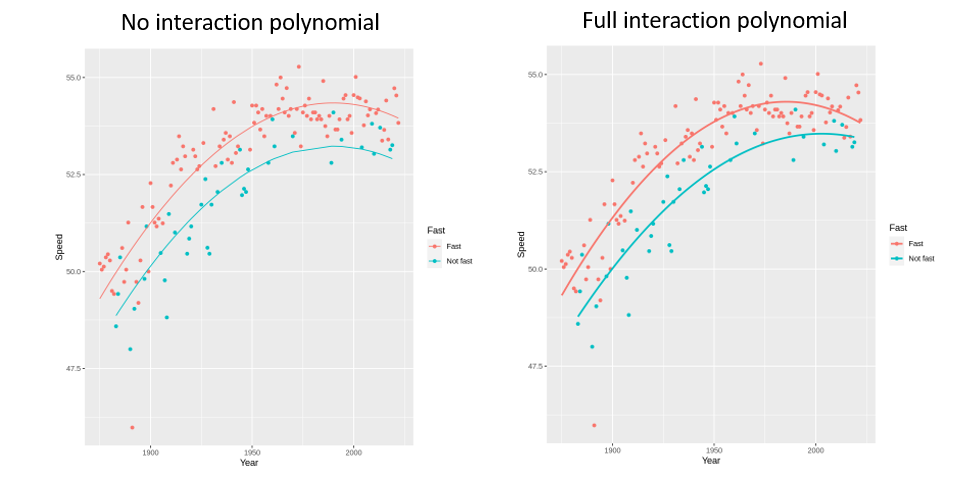

# The MLR assumptions

Recall the following important assumptions from your STAT 360 course:

1. The MLR model fits well: the residuals have mean 0, and there is no relationship between fitted values $\hat Y_i$ and the residuals $\hat \epsilon_i$.
  - Implication of violation
    * Predictions will be systematically wrong;
    * Coefficient interpretations will not accurately describe $X\rightarrow Y$ relationships.
2. The variance of the residuals is constant: $Var(\epsilon_i) = \sigma^2$ for all $i$.
  - Implication of violation
    * Coefficient standard errors will be wrong, so test statistics/p-values/confidence intervals will all be invalid.


Both assumptions can be assessed using a residual plot of the $\hat \epsilon_i$ on the vertical and the $\hat Y_i$ on the horizontal.  In `R`, use

```plot(lm_model, which = 1)```

to obtain this plot.

Another useful plot is the *scale-location plot*, which plots a scaled version of the $|\hat \epsilon_i|$ on the vertical and the $\hat Y_i$ on the horizontal.  This plot can be used to assess ***constant variance***.  If satisfied, there should be no relationship between the scaled absolute residuals and the fitted values, so a smooth of this relationship should be flat.  

Use

```plot(lm_model, which = 3)```

to obtain this plot.

The scale-location plot can often reveal issues with non-constant variance that are difficult to pick up on in the classic residual plot.

Consider the examples below:

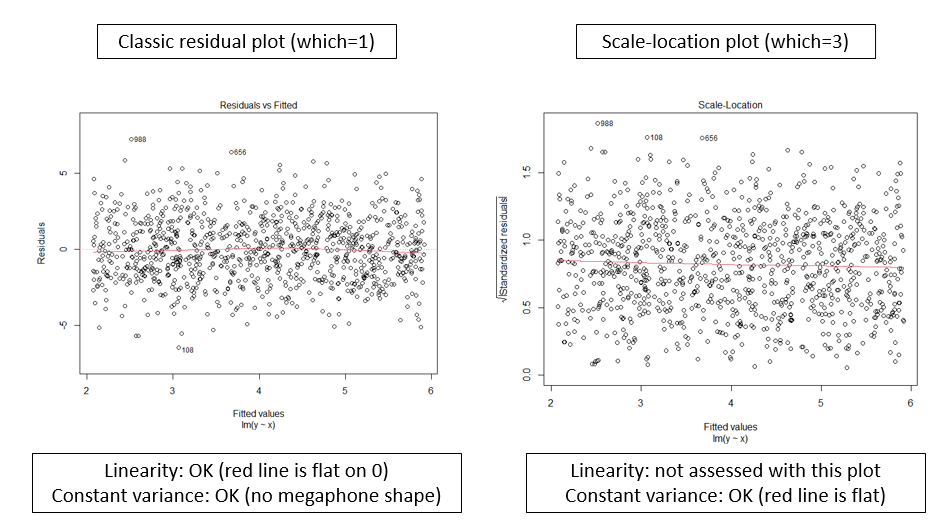

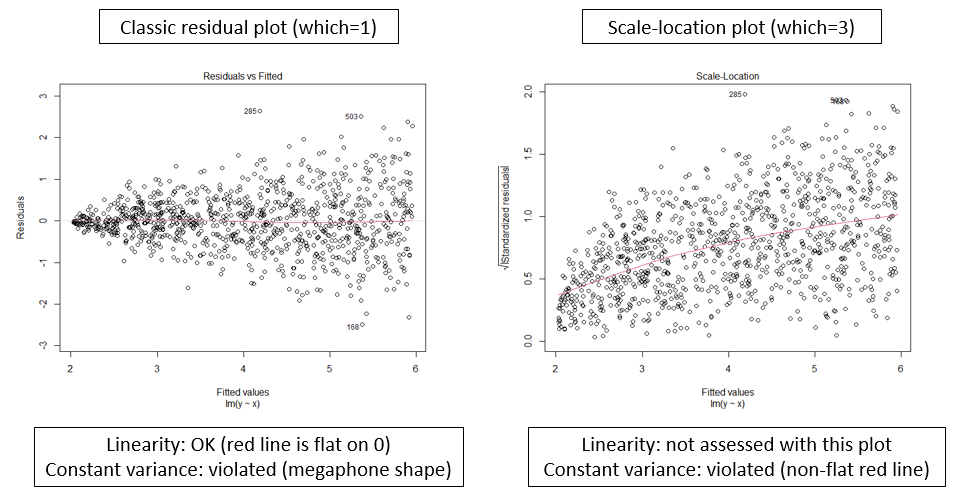

## Task

Create the classic residual plot and the scale location plots for the `quadratic_additive_model`, and comment on assumptions.

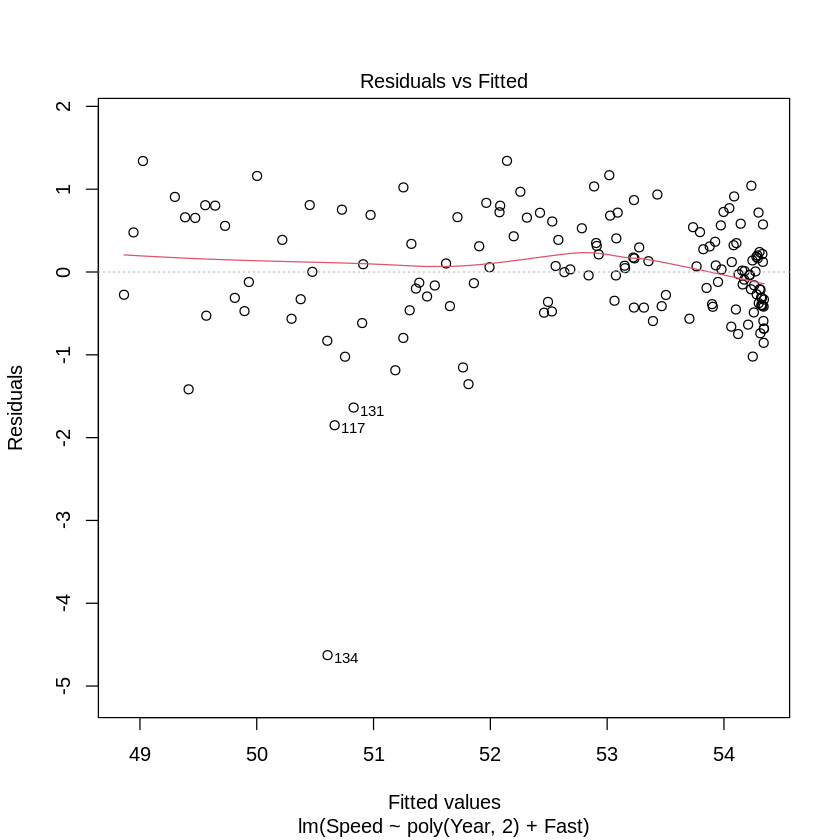

In [ ]:
#Classic residual plot:
plot(quadratic_additive_model_shortcut, which=1)

In [ ]:
# comments
# fit quality looks pretty good, - the red smooth lies pretty flat on the 0 line.
# Constatn variance looks pretty good - no  obious megaphone pattern.

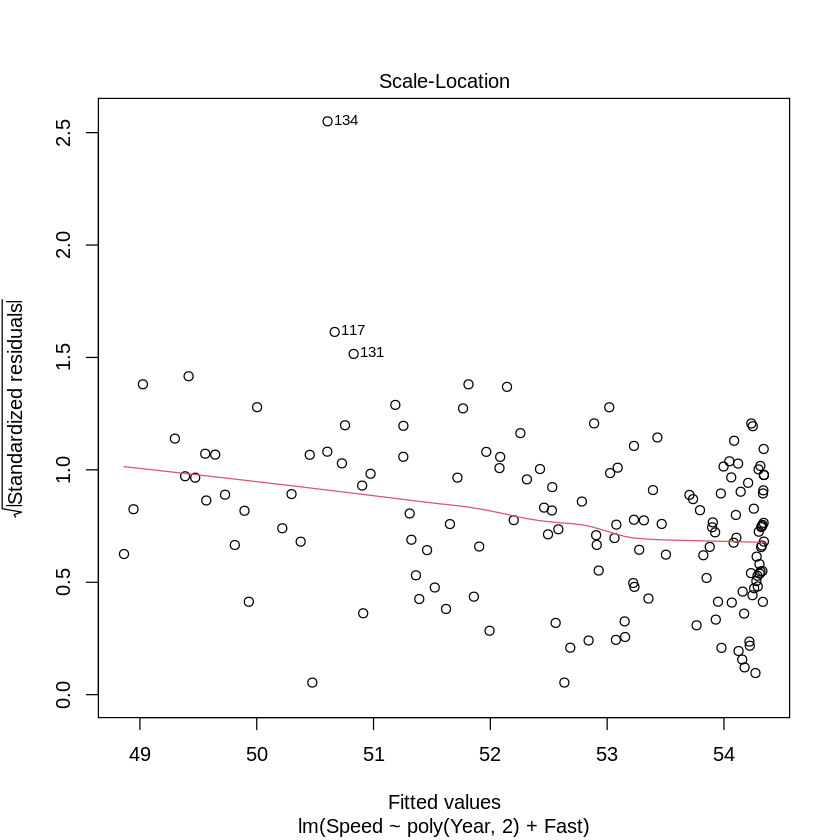

In [ ]:
# Scale-location plot:
plot(quadratic_additive_model_shortcut, which=3)

In [ ]:
# Comments:
# this plot suggests potential issues with nonconstant variance: the smooth of this plot is not flat.
# >>> 1) transformation or
# >>> 2) add more polynomials

## Addressing violations

* If linearity is violated, you can try:
  - Transformations of $X$ and/or $Y$;
  - Higher-order polynomial $X$ terms
* If constant variance is violated, you can:
  - Use transformations.  Drawback: parameter interpretation can become difficult.
  - Use heteroskedastic-consistent, aka "sandwich," standard errors.

With $\mathbf{X}$ representing the model matrix, the two variance estimators are:

Constant variance estimator:

$$Var(\underline{\hat\beta}) =  \hat\sigma^2(\mathbf{X}^T\mathbf{X})^{-1}$$

Heteroskedasticity-consistent (HC) sandwich estimator:

$$Var(\underline{\hat\beta}) =(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T \mathbf{\Omega}\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1},$$

where $\mathbf{\Omega}=diag\left(\frac{\hat e_i^2}{(1−h_{ii})^2}\right)$ with $h_{ii}$ representing the leverage value of the $i^{th}$ data point.

We can obtain sandwich SE estimators using the `sandwich` package, while `lmtest` gives us nicely formatted output.  Let's do this and compare the coefficient SEs on our additive quadratic model:

In [ ]:
install.packages('sandwich')
library(sandwich)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('lmtest')
library(lmtest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [ ]:
#Same as the summary() output; default "constant variance" standard errors:
coeftest(quadratic_additive_model)


t test of coefficients:

               Estimate  Std. Error  t value  Pr(>|t|)    
(Intercept) -1.4601e+03  1.3366e+02 -10.9236 < 2.2e-16 ***
Year         1.5210e+00  1.3717e-01  11.0880 < 2.2e-16 ***
I(Year^2)   -3.8218e-04  3.5182e-05 -10.8628 < 2.2e-16 ***
FastYes      1.1136e+00  1.3425e-01   8.2952 6.575e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
coefci(quadratic_additive_model) %>% round(5)

,2.5 %,97.5 %
(Intercept),-1724.21703,-1195.89536
Year,1.24988,1.79208
I(Year^2),-0.00045,-0.00031
FastYes,0.84831,1.37896


In [ ]:
#Robust, HC, sandwich standard errors:
coeftest(quadratic_additive_model, vcov. = vcovHC)


t test of coefficients:

               Estimate  Std. Error  t value  Pr(>|t|)    
(Intercept) -1.4601e+03  1.2982e+02 -11.2464 < 2.2e-16 ***
Year         1.5210e+00  1.3239e-01  11.4884 < 2.2e-16 ***
I(Year^2)   -3.8218e-04  3.3740e-05 -11.3271 < 2.2e-16 ***
FastYes      1.1136e+00  1.3764e-01   8.0912 2.101e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
coefci(quadratic_additive_model, vcov. = vcovHC) %>% round(5)

,2.5 %,97.5 %
(Intercept),-1716.63347,-1203.47892
Year,1.25932,1.78263
I(Year^2),-0.00045,-0.00032
FastYes,0.84162,1.38565


In this case, there is not much difference between the default and HC standard error estimates, but this will not always be the case!  Make sure to check constant variance and use sandwich HC standard errors if needed.